#Fitting Functions, Part 1
##Functions and fits

A function, say for example $f(x)=a_0 + a_1 x + a_2x^2$, has several numerical ingredients:

* the **independent variable(s)** $x$ (or $x,y,...$ for functions of more than one variable), which are inputs to the function;
* the **dependent variable** $f(x)$, which is the output of the function;
* the **parameters** $a_k$.

When fitting a function to data, we have a set of $N$ data points $(x_i,y_i)$, where $i=1,...,N$, and we want to determine the set of parameters $a_k$ which best describe the data.  In other words, we want $f(x_i)$ to be as close as possible to $y_i$ for the whole dataset $(x_i,y_i)$.

The simple difference $f(x_i)-y_i$ is not helpful, because a positive difference on one point can be cancelled by a negative difference elsewhere.  For example, take the straight line $y = mx + c$: if we sum the difference $y_i-mx_i-c$ we get
$$
\sum\limits_{i=1}^{N}(y_i - mx_i -c) = \sum y_i - m\sum x_i - Nc = N(\bar{y} - m\bar{x} - c),
$$
which will be zero whenever the values of $m$ and $c$ are such that the average value of $x$ gives the correct average value of $y$, even if all the other values are wildly wrong.  This is obviously not at all satisfactory!  

Using the absolute difference, $|y_i - mx_i - c|$, would avoid this problem, but absolute values are difficult to work with because of the discontinuous change of slope at zero.  The next simplest choice is the square of the difference, 
$(y_i - mx_i - c)^2$.  If we choose $m$ and $c$ so as to minimise 
$$
\sum\limits_{i=1}^{N}(y_i-mx_i-c)^2,
$$
we are performing a **least squares fit**.  Using the language of statistics, we are minimising the variance of $y$ around $f(x)$, which seems like a very sensible thing to do.

##Fitting straight lines, part 1: the unweighted least squares fit

The straight line fit for points of equal weight is actually very easy to solve: partially differentiate the above sum with respect to $m$ and $c$ and set to zero, then solve the resulting simultaneous equations (this is done in section 7.3 of [PyMan](http://clouds.eos.ubc.ca/~phil/djpine_python/Book/_build/html/chap7/chap7_funcs.html), for example).  It's deriving the uncertainties on the best fit that is the difficult bit, and is usually glossed over in textbooks!

There are various ways of expressing the results: the best one for computation is

$$
\begin{aligned}
\hat{m} &= \frac{\sum(x_i - \bar{x})y_i}{\sum(x_i-\bar{x})x_i}\\
\hat{c} &= \bar{y} - \hat{m}\bar{x}\\
\sigma_m^2 &= \frac{1}{N-2}\frac{\sum(y_i-\hat{m}x_i-\hat{c})^2}{\sum(x_i-\bar{x})x_i}\\
\sigma_c^2 &= \sigma_m^2 \overline{x^2}
\end{aligned}
$$

where $\hat{m}$ and $\hat{c}$ are the best estimates of $m$ and $c$, and $\bar{x}$, $\bar{y}$, $\overline{x^2}$ are the mean values of $x$, $y$ and $x^2$ respectively.  This formulation, which is not the standard one, has the huge advantage of not requiring us to take the difference of large and nearly equal numbers &ndash; a recipe for problems with rounding errors.
The factor $(N-2)$ (rather than $N$) in the definition of $\sigma_m^2$ is caused by our having used up two degrees of freedom in calculating $\hat{m}$ and $\hat{c}$: essentially, we need two points to define a straight line, so only $N-2$ points are left to define the spread of the points around the line.

Here is an example of a least-squares fit to a straight line.

Input gradient and intercept  0.75 and  0.20
Fitted gradient and intercept  0.74 ±  0.04 and  0.21 ±  0.12


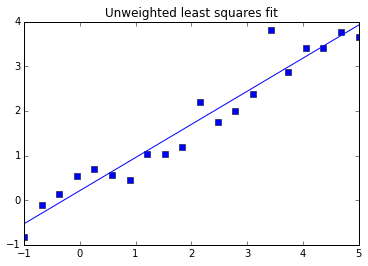

In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#define a function to return the gradient and intercept of a straight line with their variances
def linest(x,y):
    xmean = x.mean()
    m = ((x-xmean)*y).sum()/((x-xmean)*x).sum()
    c = y.mean()-m*xmean
    yfit = m*x + c
    varm = (y*y-2*y*yfit+yfit*yfit).sum()/((x-xmean)*x).sum()/(len(x)-2)
    varc = varm*(x*x).mean()
    return m,c,varm,varc

#true properties of our straight line 
mtrue = 0.75
ctrue = 0.20
sigytrue = 0.40

xmin = -1.0
xmax = 5.0
nbins = 20

x = np.linspace(xmin,xmax,nbins)
dy = np.random.normal(ctrue,sigytrue,nbins)  #random numbers normally distributed about ctrue
y = mtrue*x + dy                             #y points are scattered around mx + c with error sigytrue

mhat,chat,varm,varc = linest(x,y)            #fit these data 
sigmam = np.sqrt(varm)
sigmac = np.sqrt(varc)

print('Input gradient and intercept %5.2f'%mtrue,'and %5.2f'%ctrue)
print('Fitted gradient and intercept %5.2f'%mhat,"\u00b1",'%5.2f'%sigmam,'and %5.2f'%chat,"\u00b1",'%5.2f'%sigmac)

plt.plot(x,y,'bs',x,mhat*x+chat) #plot the data as squares and the fit as a line
plt.title('Unweighted least squares fit')

Notice that we have not used any measurement errors in the determination of $\hat{m}\pm\sigma_m$ and $\hat{c}\pm\sigma_c$.  This is because the least-squares fit is using the scatter of the points to deduce the uncertainty.  Furthermore, it is assuming that every point has the *same* uncertainty: it is an **unweighted least squares fit**.  I have called this function **linest** because this is exactly what the Excel function **linest** does.

Also notice that, because the definition of $\hat{c}$ includes $\hat{m}$, the errors on $\hat{c}$ and $\hat{m}$ are **correlated**.  If our value of $\hat{m}$ goes up, our value of $\hat{c}$ necessarily goes down.

###Using the unweighted least squares fit

Before deciding to use an unweighted least squares fit, you should think about the following points.

1. *Are my data consistent with a straight line?*  If you ask a function to fit a straight line, it will fit a straight line, whether the data lie on one or not.  
2. *Which is my dependent variable?*  The least squares fit minimises the variance of $y$ &ndash; i.e., it assumes that the $x$ values are correct and the $y$ values are randomly scattered.  If both the variables in your data have uncertainties, you should set up the fit so that the quantity with larger errors is $f(x)$.  For example, the Hubble law of the expanding universe is usually quoted as $v = H_0d$, where $v$ is the Doppler velocity and $d$ is the distance.  In practice, however, $v$ is usually well measured whereas $d$ has large errors, so we should really fit $d = v/H_0$.
3. *Is an **unweighted** fit justified?*  In minimising $(y_i - mx_i - c)^2$, we are very sensitive to occasional points a long way off the true line.  This means that any badly measured points with large error bars are likely to pull the fit a long way from the proper value.  If your measurements have estimated uncertainties that are not the same from point to point, you need a **weighted fit**, see [next notebook](fits2).

The code below shows examples of misusing a straight line fit and of the consequences of a single bad point.  

Fitted gradient and intercept  3.01 ±  0.27 and -0.56 ±  0.74
Input gradient and intercept  0.75 and  0.20
Fitted gradient and intercept  0.59 ±  0.06 and  0.79 ±  0.16


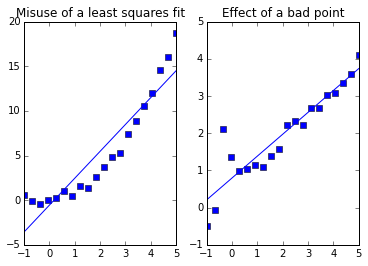

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#define a function to return the gradient and intercept of a straight line with their variances
def linest(x,y):
    xmean = x.mean()
    m = ((x-xmean)*y).sum()/((x-xmean)*x).sum()
    c = y.mean()-m*xmean
    yfit = m*x + c
    varm = (y*y-2*y*yfit+yfit*yfit).sum()/((x-xmean)*x).sum()/(len(x)-2)
    varc = varm*(x*x).mean()
    return m,c,varm,varc

#true properties of our straight line 
mtrue = 0.75
ctrue = 0.20
sigytrue = 0.30

xmin = -1.0
xmax = 5.0
nbins = 20

x = np.linspace(xmin,xmax,nbins)
dy = np.random.normal(0.0,sigytrue,nbins)  #random numbers normally distributed about ctrue
y = mtrue*x*x + dy                         #y points are actually a quadratic
dz = np.random.normal(ctrue,sigytrue,nbins)
z = mtrue*x + dz
z[2] = z[2] + 8*sigytrue #introduce a bad point

mhat,chat,varm,varc = linest(x,y)            #fit xy data
sigmam = np.sqrt(varm)
sigmac = np.sqrt(varc)

print('Fitted gradient and intercept %5.2f'%mhat,"\u00b1",'%5.2f'%sigmam,'and %5.2f'%chat,"\u00b1",'%5.2f'%sigmac)

m1,c1,varm1,varc1 = linest(x,z)             #fit xz data
sigm1 = np.sqrt(varm1)
sigc1 = np.sqrt(varc1)

print('Input gradient and intercept %5.2f'%mtrue,'and %5.2f'%ctrue)
print('Fitted gradient and intercept %5.2f'%m1,"\u00b1",'%5.2f'%sigm1,'and %5.2f'%c1,"\u00b1",'%5.2f'%sigc1)

plt.subplot(121)
plt.plot(x,y,'bs',x,mhat*x+chat) #plot the data as squares and the fit as a line
plt.title('Misuse of a least squares fit')

plt.subplot(122)
plt.plot(x,z,'bs',x,m1*x+c1) #plot the data as squares and the fit as a line
plt.title('Effect of a bad point')

##Summary

The unweighted least squares fit to a straight line is the simplest and most familiar example of fitting a function to data.  Before using this fit, you should ensure that

* your data appear to be well described by a straight line;
* all your data points have comparable error bars;
* you have set up your fit so that the coordinate with the (larger) error bars is the dependent (*y*) variable.

If one or more of the above points is not true, you will need a more complicated fitting procedure, as described in the [next section](fits2).